<a href="https://colab.research.google.com/github/skarot/DeepLearning/blob/main/SamplingTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank churn rate prediction and evaluation using ANN

## Configure download from kaggle to colab

In [452]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [453]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [454]:
! cp '/kaggle.json' ~/.kaggle

cp: cannot stat '/kaggle.json': No such file or directory


In [455]:
! chmod 600 ~/.kaggle

## Import Libraries

In [456]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow import keras

## Load Data

In [457]:
#! kaggle datasets download  'https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling' -p /bank_data/ --unzip

In [458]:
pwd

'/content'

In [459]:
df = pd.read_csv("/Churn_Modelling.csv")

## EDA

In [460]:
df.shape

(10000, 14)

In [461]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [462]:
for col in df.columns:
  print(f'{df[col]}: {df[col].unique()}')

0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: RowNumber, Length: 10000, dtype: int64: [    1     2     3 ...  9998  9999 10000]
0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Lengt

In [463]:
for col in df.columns:
  print(df[col].value_counts())

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Lengt

Check if data is balanced or not


In [464]:
df[df['Exited']==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [465]:
df[df['Exited'] == 0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


## Preprocessing
Remove uneccesary columns

In [466]:
df1 = df.drop(columns = ['CustomerId','RowNumber','Surname'])

In [467]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [468]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## One hot encoding

In [469]:
np.max(df['CreditScore'])


850

In [470]:
np.min(df['CreditScore'])

350

In [471]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['CreditScore','Age','Balance','EstimatedSalary', 'Tenure','NumOfProducts']
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [472]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,France,Male,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,France,Female,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,Germany,Male,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


Convert Male female to 0 and 1

In [473]:
df1.replace({'Female':1,'Male':0},inplace = True)

In [474]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,Spain,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,France,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,France,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,Spain,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,France,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,France,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,Germany,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


Convert Geograpy into one hot encoded columns

In [475]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df1[['Geography']])

In [476]:
ohe.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [477]:
df1[ohe.categories_[0]] = transformed.toarray()

In [478]:
df1.drop(columns = ['Geography'], inplace  =True)

In [479]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1.0,0.0,0.0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.0,0.0,1.0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.0,0.0,0.0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1.0,0.0,0.0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1.0,0.0,0.0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1.0,0.0,0.0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1.0,0.0,0.0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0.0,1.0,0.0


No all the columns are scaled between 0 and 1

## Generate X and y

Move Exited column to the end of dataframe

In [480]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'France',
       'Germany', 'Spain'],
      dtype='object')

In [481]:
df1 = df1.reindex(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France',
       'Germany', 'Spain', 'Exited'],axis = 1)

In [482]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1.0,0.0,0.0,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0.0,0.0,1.0,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1.0,0.0,0.0,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1.0,0.0,0.0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1.0,0.0,0.0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1.0,0.0,0.0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1.0,0.0,0.0,1
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0.0,1.0,0.0,1


In [483]:
X = df1.iloc[:,:12]

In [484]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1.0,0.0,0.0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0.0,0.0,1.0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1.0,0.0,0.0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1.0,0.0,0.0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1.0,0.0,0.0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1.0,0.0,0.0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1.0,0.0,0.0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0.0,1.0,0.0


In [485]:
y = df1.iloc[:,12:]

In [486]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


Lets train the model on imbalanced data set and calculate accuracy to compare later with balanced trained model performance.

In [487]:
from sklearn.model_selection import train_test_split
def split_data(X,y):
  X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 4)
  return X_train,X_test, y_train,y_test

In [488]:
X_train.shape

(7000, 12)

In [489]:
y_train.shape

(7000, 1)

Create a generic method that can return the model based on x_train,
y_train passed as parameters.

In [490]:
def get_model(X_train,y_train):
  model = keras.Sequential([keras.layers.Dense(12,activation = 'relu'),
                            keras.layers.Dense(10,activation = 'relu'),
                            keras.layers.Dense(1,activation = 'sigmoid')
                            ])

  model.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics ='accuracy')
  model.fit(X_train,y_train, epochs = 5)
  return model


Generic method for model evaluation

In [491]:
def get_eval_score(model, X_test,y_test):
  loss, accuracy = model.evaluate(X_test,y_test)
  return accuracy

Test for unbalanced dataset

In [492]:
X_train,X_test, y_train,y_test = split_data(X,y)

In [493]:
model = get_model(X_train,y_train)

Epoch 1/5
219/219 [==============================] - 1s 2ms/step - loss: 0.5232 - accuracy: 0.7924
Epoch 2/5
219/219 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7924
Epoch 3/5
219/219 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7919
Epoch 4/5
219/219 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7941
Epoch 5/5
219/219 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7976


In [494]:

print(get_eval_score(model,X_test,y_test))

94/94 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8150
0.8149999976158142


**Accuracy for imbalanced dataset is 0.81**

In [495]:
def get_yhat(X_test):
  y_hat = model.predict(X_test)
  return y_hat

In [496]:
y_hat = get_yhat(X_test)

In [497]:
def get_pred(y_hat):
  y_pred = []
  for i in range(len(y_hat)):
    if y_hat[i][0]<0.5:
      y_pred.append(0)
    else:
      y_pred.append(1)
  return y_pred

In [498]:
y_pred = get_pred(y_hat)

In [499]:
from sklearn.metrics import confusion_matrix,classification_report
def create_cm(y_test,y_pred):
  cm = tf.math.confusion_matrix(y_test,y_pred)
  return cm

In [500]:
def show_cm(cm):
  plt.figure(figsize=(10,5))
  plt.xlabel = 'Predicted'
  plt.ylabel = 'Truth'
  sb.heatmap(cm, annot = True,fmt = 'd')

In [501]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2416
           1       0.91      0.05      0.10       584

    accuracy                           0.81      3000
   macro avg       0.86      0.53      0.50      3000
weighted avg       0.83      0.81      0.74      3000



**NOTE** - F1 score for both classes varies too much, for class 0 it is 0.89 while class 1 has 0.18. Even if the accuracy is high the model is overfitted and will not work well for new data, as its is not genaralized.



---



In [502]:
X_train.shape

(7000, 12)

In [503]:
y[y['Exited']==0]

,Exited
1,0
3,0
4,0
6,0
8,0
...,...
9993,0
9994,0
9995,0
9996,0


In [504]:
y[y['Exited']==1]

,Exited
0,1
2,1
5,1
7,1
16,1
...,...
9981,1
9982,1
9991,1
9997,1


Exited count is 2037 rows and not exited is 7963 rows. This is Imbalanced data. We will use Undersampling, Oversampling, Ensumble, Smote, focal loss.

## Handling imbalanced data


1.   Undersampling 
2.   Oversampling
3.   Ensemble
4.   Smote
5.   Focal loss



### Undersampling - reducing the majority class samples

In [505]:
df1_nonExited = df1[df['Exited']==0]

In [506]:
df1_exited = df1[df['Exited']==1]

In [507]:
df1_nonExited_undersampling = df1_nonExited.sample(2037)

In [508]:
df1_nonExited_undersampling.shape

(2037, 13)

In [509]:
df1_undersampling = df1_exited.merge(df1_nonExited_undersampling,how='outer')

In [510]:
df1_undersampling.shape

(4074, 13)

In [511]:
df1_undersampling

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1.0,0.0,0.0,1
1,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1.0,0.0,0.0,1
2,0.590,0,0.351351,0.8,0.453394,0.333333,1,0,0.748797,0.0,0.0,1.0,1
3,0.052,1,0.148649,0.4,0.458540,1.000000,1,0,0.596733,0.0,1.0,0.0,1
4,0.606,0,0.540541,0.1,0.528513,0.000000,1,0,0.025433,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,1.000,1,0.324324,0.3,0.000000,0.333333,1,1,0.884444,1.0,0.0,0.0,0
4070,0.616,1,0.175676,0.7,0.494125,0.000000,1,0,0.510760,1.0,0.0,0.0,0
4071,0.608,0,0.500000,0.3,0.348690,0.000000,1,1,0.016439,1.0,0.0,0.0,0
4072,0.546,1,0.135135,0.4,0.000000,0.333333,1,0,0.206100,1.0,0.0,0.0,0


In [512]:
X_undersampling = df1_undersampling.iloc[:,:12]
y_undersampling = df1_undersampling.iloc[:,12:]

In [513]:
X_undersampling.shape

(4074, 12)

In [514]:
X_train,X_test, y_train,y_test = split_data(X_undersampling,y_undersampling)

In [515]:
model = get_model(X_train,y_train)
accuracy = get_eval_score(model,X_test,y_test)

Epoch 1/5
90/90 [==============================] - 1s 2ms/step - loss: 0.6830 - accuracy: 0.5626
Epoch 2/5
90/90 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6121
Epoch 3/5
90/90 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6321
Epoch 4/5
90/90 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6468
Epoch 5/5
39/39 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6509


In [516]:
accuracy

0.6508585214614868

In [517]:
y_hat = get_yhat(X_test)

In [518]:
y_pred = get_pred(y_hat)

In [519]:
cm = create_cm(y_test,y_pred)

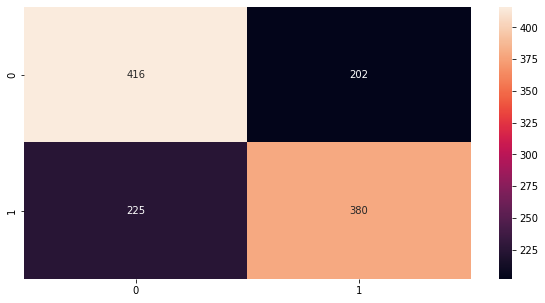

In [520]:
show_cm(cm)

In [521]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       618
           1       0.65      0.63      0.64       605

    accuracy                           0.65      1223
   macro avg       0.65      0.65      0.65      1223
weighted avg       0.65      0.65      0.65      1223



**NOTE** - F1 score for both classes is almost same meaning the model is not biased. Even if the accuracy is low the model is appropriate and will work well for new data, as its is genaralized. We can increase epoch, layers etc for accuracy.



---



### Oversampling - increasing the minority class samples

In [522]:
df1_exited_oversampling  = df1_exited.append(df1_exited)

In [523]:
df1_exited_oversampling = df1_exited_oversampling.append(df1_exited)

In [524]:
df1_exited_oversampling = df1_exited_oversampling.append(df1_exited.iloc[:1852,:])

In [525]:
df1_exited_oversampling.shape

(7963, 13)

In [526]:
df1_nonExited.shape

(7963, 13)

Both the classes have same number of rows now.

In [527]:
df_oversampling = df1_nonExited.append(df1_exited_oversampling)

In [528]:
df_oversampling.shape

(15926, 13)

In [529]:
df_oversampling

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0.0,0.0,1.0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1.0,0.0,0.0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0.0,0.0,1.0,0
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,1.0,0.0,0.0,0
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8932,0.726,1,0.108108,0.4,0.489671,0.333333,1,0,0.723422,0.0,0.0,1.0,1
8935,0.620,1,0.337838,0.1,0.000000,0.000000,0,1,0.560126,1.0,0.0,0.0,1
8936,0.434,0,0.486486,0.9,0.384232,0.000000,0,0,0.260143,1.0,0.0,0.0,1
8948,0.466,0,0.405405,0.3,0.363680,0.000000,1,0,0.300058,1.0,0.0,0.0,1


In [530]:
X = df_oversampling.iloc[:,:12]


In [531]:
X.shape

(15926, 12)

In [532]:
y = df_oversampling.iloc[:,12:]

In [533]:
y.shape

(15926, 1)

In [534]:
X_train,X_test,y_train,y_test = split_data(X,y)

In [535]:
model= get_model(X_train,y_train)

Epoch 1/5
349/349 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5608
Epoch 2/5
349/349 [==============================] - 1s 2ms/step - loss: 0.6208 - accuracy: 0.6620
Epoch 3/5
349/349 [==============================] - 1s 2ms/step - loss: 0.5972 - accuracy: 0.6865
Epoch 4/5
349/349 [==============================] - 1s 2ms/step - loss: 0.5824 - accuracy: 0.6999
Epoch 5/5
349/349 [==============================] - 1s 2ms/step - loss: 0.5745 - accuracy: 0.7063


In [536]:
accuracy = get_eval_score(model,X_test,y_test)

150/150 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7005


In [537]:
y_hat = get_yhat(X_test)

In [538]:
y_pred = get_pred(y_hat)

In [539]:
cm = create_cm(y_test,y_pred)

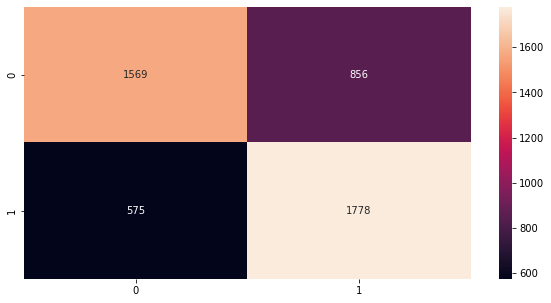

In [540]:
show_cm(cm)

In [541]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2425
           1       0.68      0.76      0.71      2353

    accuracy                           0.70      4778
   macro avg       0.70      0.70      0.70      4778
weighted avg       0.70      0.70      0.70      4778



NOTE - F1 scores are close for both classes and accuracy has increased

### Ensemble - Divide majority into equal samples of size minority. Train 3 models and take max of 3 model predictions. 

In [542]:
df1_nonexited.shape

(7961, 0)

In [543]:
7961/3

2653.6666666666665

In [544]:
df1_nonexited_s1 =df1_nonExited.loc[:2651]

In [545]:
df1_nonexited_s2 =df1_nonexited.loc[2651:5401,:]

In [546]:
df1_nonexited_s3 =df1_nonexited.loc[5401:7961,:]

In [547]:
df1_nonexited_s1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0.0,0.0,1.0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1.0,0.0,0.0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0.0,0.0,1.0,0
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,1.0,0.0,0.0,0
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,0.150,1,0.283784,0.5,0.000000,0.333333,1,0,0.704717,0.0,0.0,1.0,0
2648,0.790,0,0.040541,0.4,0.549667,0.000000,1,1,0.886203,1.0,0.0,0.0,0
2649,0.532,1,0.256757,0.6,0.000000,0.333333,1,0,0.431194,1.0,0.0,0.0,0
2650,0.474,0,0.202703,0.5,0.399034,0.000000,1,0,0.171036,1.0,0.0,0.0,0


In [548]:
df1_ensemble_s1 = df1_nonexited_s1.append(df1_exited)

In [549]:
df1_ensemble_s2 = df1_nonexited_s2.append(df1_exited)

In [550]:
df1_ensemble_s3 = df1_nonexited_s3.append(df1_exited)

In [551]:
df1_ensemble_s1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0.0,0.0,1.0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1.0,0.0,0.0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0.0,0.0,1.0,0
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,1.0,0.0,0.0,0
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,0,0.324324,0.3,0.605982,0.000000,1,1,0.267193,0.0,1.0,0.0,1
9982,0.610,1,0.378378,0.7,0.546617,0.000000,1,0,0.575729,0.0,1.0,0.0,1
9991,0.494,1,0.472973,0.4,0.352259,0.000000,1,0,0.346899,1.0,0.0,0.0,1
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1.0,0.0,0.0,1


In [552]:
X = df1_ensemble_s1.iloc[:,:12]

In [553]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0.0,0.0,1.0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1.0,0.0,0.0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0.0,0.0,1.0
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,1.0,0.0,0.0
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,0,0.324324,0.3,0.605982,0.000000,1,1,0.267193,0.0,1.0,0.0
9982,0.610,1,0.378378,0.7,0.546617,0.000000,1,0,0.575729,0.0,1.0,0.0
9991,0.494,1,0.472973,0.4,0.352259,0.000000,1,0,0.346899,1.0,0.0,0.0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1.0,0.0,0.0


In [554]:
y = df1_ensemble_s1.iloc[:,12:]

In [558]:
X_train,X_test,y_train,y_test = split_data(X,y)
model= get_model(X_train,y_train)
accuracy = get_eval_score(model,X_test,y_test)
y_hat = get_yhat(X_test)
y_pred = get_pred(y_hat)


Epoch 1/5
91/91 [==============================] - 1s 2ms/step - loss: 0.7050 - accuracy: 0.4976
Epoch 2/5
91/91 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5852
Epoch 3/5
91/91 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6163
Epoch 4/5
91/91 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6288
Epoch 5/5
39/39 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6511


In [ ]:
y_pred

In [561]:
cm = create_cm(y_test,y_pred)


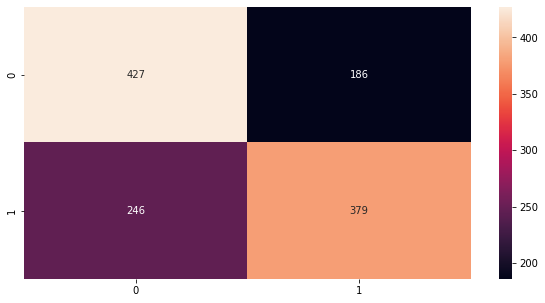

In [562]:
show_cm(cm)

In [563]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.70      0.66       613
           1       0.67      0.61      0.64       625

    accuracy                           0.65      1238
   macro avg       0.65      0.65      0.65      1238
weighted avg       0.65      0.65      0.65      1238



### SMOTE

In [564]:
pip install imbalanced-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [567]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smo.fit_resample(X,y)

In [568]:
y_sm.value_counts()

Exited
0         2089
1         2089
dtype: int64

Epoch 1/5
91/91 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.5125
Epoch 2/5
91/91 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5682
Epoch 3/5
91/91 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6160
Epoch 4/5
91/91 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.6427
Epoch 5/5
39/39 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.6519
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       613
           1       0.69      0.56      0.62       625

    accuracy                           0.65      1238
   macro avg       0.66      0.65      0.65      1238
weighted avg       0.66      0.65      0.65      1238



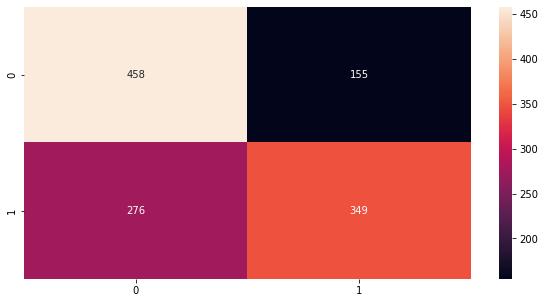

In [569]:
X_train,X_test,y_train,y_test = split_data(X,y)
model= get_model(X_train,y_train)
accuracy = get_eval_score(model,X_test,y_test)
y_hat = get_yhat(X_test)
y_pred = get_pred(y_hat)
cm = create_cm(y_test,y_pred)
show_cm(cm)
print(classification_report(y_test,y_pred))
